In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#read data
df = pd.read_csv(r"D:\Jeeva\ds_course\insurance_final_project\data\cleaned_data\cleaned_insurance_data.csv")
df.head()
df.columns

Index(['police_report', 'claim_amount', 'total_policy_claims', 'fraudulent',
       'incident_cause_driver_error', 'incident_cause_natural_causes',
       'incident_cause_other_causes', 'incident_cause_other_driver_error',
       'claim_area_home', 'claim_type_material_and_injury',
       'claim_type_material_only', 'claim_year', 'claim_month', 'claim_day',
       'high_risk'],
      dtype='object')

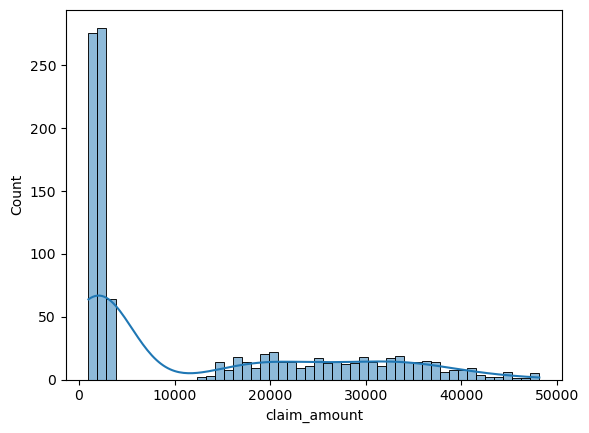

Number of outliers: 0
Empty DataFrame
Columns: [claim_amount]
Index: []


In [3]:
sns.histplot(df['claim_amount'], bins=50, kde=True)
plt.show()
Q1 = df['claim_amount'].quantile(0.25)
Q3 = df['claim_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['claim_amount'] < lower_bound) | (df['claim_amount'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(outliers[['claim_amount']])


In [5]:
print(df['claim_amount'].describe())

count     1035.000000
mean     12442.125121
std      13766.391982
min       1000.000000
25%       1870.000000
50%       2740.000000
75%      24300.000000
max      48150.500000
Name: claim_amount, dtype: float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   police_report                      1035 non-null   int64  
 1   claim_amount                       1035 non-null   float64
 2   total_policy_claims                1035 non-null   float64
 3   fraudulent                         1035 non-null   int64  
 4   incident_cause_driver_error        1035 non-null   bool   
 5   incident_cause_natural_causes      1035 non-null   bool   
 6   incident_cause_other_causes        1035 non-null   bool   
 7   incident_cause_other_driver_error  1035 non-null   bool   
 8   claim_area_home                    1035 non-null   bool   
 9   claim_type_material_and_injury     1035 non-null   bool   
 10  claim_type_material_only           1035 non-null   bool   
 11  claim_year                         1035 non-null   int64

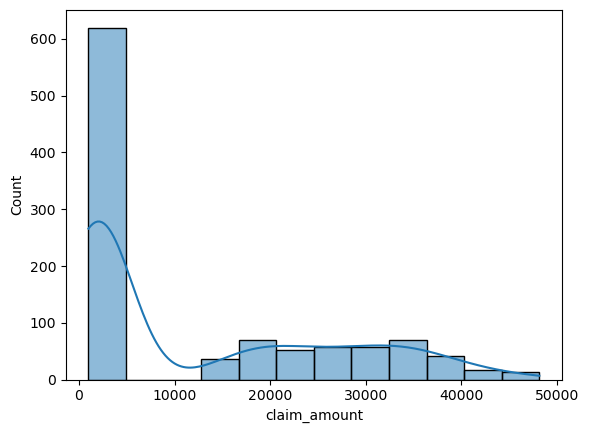

0.8372420543048955

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['claim_amount'], kde=True)
plt.show()

# Also check skewness
df['claim_amount'].skew()


In [9]:
# Feature-Target Correlation
df.corr(numeric_only=True)['claim_amount'].sort_values(ascending=False)

claim_amount                         1.000000
claim_type_material_and_injury       0.638739
high_risk                            0.522156
police_report                        0.355560
incident_cause_other_causes          0.107359
incident_cause_other_driver_error    0.088258
incident_cause_driver_error          0.060486
fraudulent                           0.021749
claim_year                           0.013674
claim_day                            0.006861
claim_month                          0.006451
total_policy_claims                 -0.020612
claim_area_home                     -0.040711
incident_cause_natural_causes       -0.178278
claim_type_material_only            -0.921820
Name: claim_amount, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   police_report                      1035 non-null   int64  
 1   claim_amount                       1035 non-null   float64
 2   total_policy_claims                1035 non-null   float64
 3   fraudulent                         1035 non-null   int64  
 4   incident_cause_driver_error        1035 non-null   bool   
 5   incident_cause_natural_causes      1035 non-null   bool   
 6   incident_cause_other_causes        1035 non-null   bool   
 7   incident_cause_other_driver_error  1035 non-null   bool   
 8   claim_area_home                    1035 non-null   bool   
 9   claim_type_material_and_injury     1035 non-null   bool   
 10  claim_type_material_only           1035 non-null   bool   
 11  claim_year                         1035 non-null   int64

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
import joblib


X = df.drop(columns=['claim_amount','claim_type_material_only'])
y = df['claim_amount']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)


models = {
    "Linear_Regression": LinearRegression(),
    "rf_predict_claim":RandomForestRegressor(n_estimators = 100,random_state = 42),
    "XGBoost":XGBRegressor(n_estimators = 100,random_state = 42)
}

results = {}

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test,y_pred,squared = False)
    r2score = r2_score(y_test,y_pred)
    results[name] = {'RMSE':rmse,'r2':r2score}

    joblib.dump(model,f"{name}_model.pkl")

results_df = pd.DataFrame(results).T
print(results_df)

loaded_rf = joblib.load("Random_Forest_model.pkl")
pred = loaded_rf.predict(X_test[:1])
print("Random Forest prediction example:", pred)
    

C:\Users\JEEVA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\JEEVA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\JEEVA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


                          RMSE        r2
Linear_Regression  8242.776554  0.640372
rf_predict_claim   8053.153147  0.656728
XGBoost            8736.056236  0.596040
Random Forest prediction example: [9950.3175]
